# ЦПТ на примере бета-распределения

Пусть $\xi_1, \xi_2, \dotsc-$ независимые одинаково распределённые случайные величины c $ E\xi_1 = a$ и $D\xi_1 = \sigma^2$.  
Тогда $\frac{\xi_1 + \dotsc + \xi_n}{n} = X_n \xrightarrow{\text{d}} \eta \sim \mathcal{N}(a, \frac{\sigma^2}{n})$   

$\xi \sim \mathcal{B}(\alpha, \beta) - $ бета-распределение с параметрами $\alpha$ и $\beta$  
$E\xi = \dfrac{\alpha}{\alpha + \beta}$  
$D\xi = \dfrac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [6]:
# Создаём случайную величину, имеющую бета-распределение с параметрами 2 и 5, и выборку размера 1000
# Также сохраняем её мат.ожидание и дисперсию

a = 2
b = 5
beta_d = sts.beta(a=a, b=b)
beta_sample = beta_d.rvs(size=1000)
beta_mean = a / (a + b)
beta_var = a * b / (a + b + 1) / (a + b) ** 2

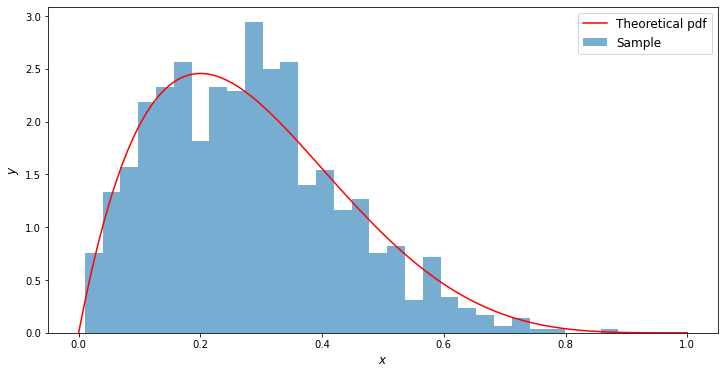

In [12]:
# Гистограмма выборки и теоретическая плотность бета-распределения

x = np.linspace(0, 1, 100)

plt.figure(figsize=(12, 6))
plt.hist(beta_sample, bins=30, density=True, alpha=0.6, label='Sample')
plt.plot(x, beta_d.pdf(x), label='Theoretical pdf', color='r')
plt.ylabel('$y$', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.legend(prop={"size": 12})
plt.show()

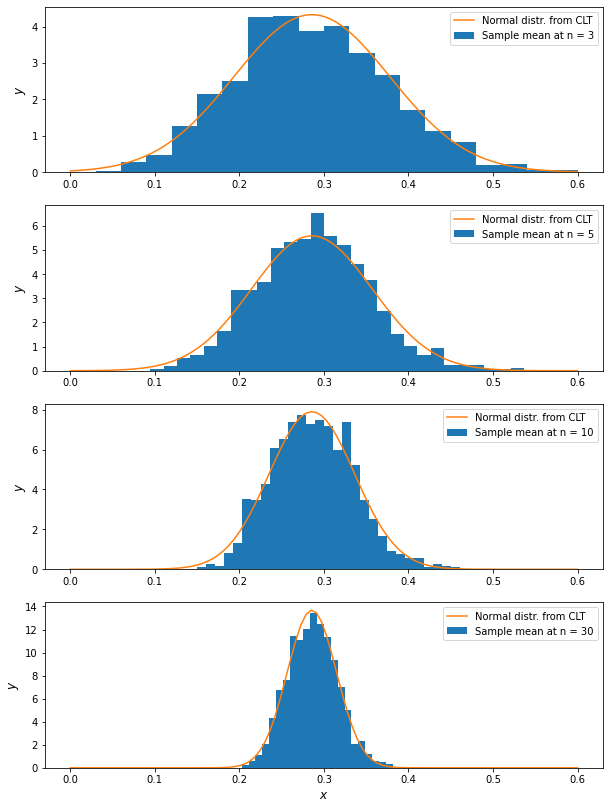

In [21]:
# Гистограммы выборочных средних при различных значениях n (3, 5, 10 и 30) и 
# теоретическая плотность нормального распределения из ЦПТ

x = np.linspace(0, 0.6, 100)
k_samples = 1000
sample_sizes = np.array([3, 5, 10, 30])
big_sample = beta_d.rvs(size=sample_sizes.max() * k_samples)

fig, axs = plt.subplots(sample_sizes.size, 1, figsize=(10, 14))
for i, n in enumerate(sample_sizes):
    sample = big_sample[:k_samples*n].reshape((k_samples, n)).mean(axis=1)
    axs[i].hist(sample, bins=20+i*18, range=(0, 0.6), 
                density=True, label='Sample mean at n = %d' % n)
    axs[i].plot(x, sts.norm(loc=beta_mean, scale=(beta_var/n)**0.5).pdf(x), 
               label='Normal distr. from CLT')
    axs[i].legend()
    axs[i].set_ylabel('$y$', fontsize=12)

plt.xlabel('$x$', fontsize=12)
plt.legend()
plt.show()

**Вывод:** С ростом параметра n увеличивается точность аппроксимации распределения выборочных средних нормальным распределением.